Task 3 a)

In [14]:
def weighted_degree_kernel(s1,s2,d,betas):
    I= 0
    K= 0
    for k in range (1,d+1):
        beta = betas[k-1]
        for l in range (0,(len(s1)-k+1) - 1):
            if (s1[l:l+k]==s2[l:l+k]):
                I = I+1
        K= K+ (beta * I)          
    return K


In [15]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Task 3 b)

In [16]:
sequences=[]
for seq_record in SeqIO.parse(r'sequencesMSAfasta.sec','fasta'):
    sequences.append(str(seq_record.seq))
#generate possible sequence combinations
s = list(range(0,len(sequences)))
combis= list(itertools.combinations_with_replacement(s, 2))
#init kernel_matrix
kernel_matrix=np.zeros((len(sequences),len(sequences)))
d= 3
betas = np.array([2*(d-k+1)/(d*(d+1)) for k in range(1,d+1)])
#fill kernel matrix
for i in range (len(combis)):
    s1= sequences[combis[i][0]]
    s2= sequences[combis[i][1]]
    kernel_matrix[combis[i][0]][combis[i][1]]= weighted_degree_kernel(s1,s2,d,betas)
    kernel_matrix[combis[i][1]][combis[i][0]]= kernel_matrix[combis[i][0]][combis[i][1]]

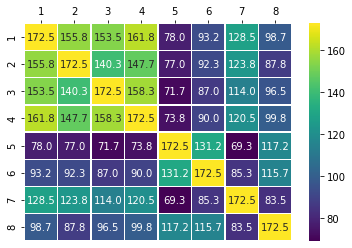

In [17]:
kernel_matrix= pd.DataFrame(kernel_matrix,columns=[1,2,3,4,5,6,7,8])
kernel_matrix.index= [1,2,3,4,5,6,7,8]
ax = sns.heatmap(kernel_matrix, cmap='viridis',annot=True,fmt=".1f",linewidth=.5)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.savefig('kernel_matrix.png', dpi=600)

Task 4 a)

In [18]:
def dirac(s1, s2):
    K = 0
    for i in range(len(s1)):
        if s1[i] == s2[i]:
            K = K + 1            
    return K

def uniform(s1, s2):
    return 1

def multitask(s1, s2):
    K = dirac(s1, s2) + uniform(s1, s2)
    return K

def peptide(s1,s2):
    K= 0
    for l in range (9):
        if (s1[l]==s2[l]):
                K = K+1         
    return K


Task 4 b)

In [21]:
from sklearn import svm

mt_svm = svm.SVC(kernel=multitask)

# What should you use for the peptide kernel?

